# Lesson 6

## Intro

Hello, everyone! Here is the material from the last sixth class. 

The last time we did this, we were looking at *regression*. In doing so, we separately considered linear regression, but what if the data we have are poorly described by linear methods? In this case, we need to select the family of functions for which we are going to build the regression on our own. Let's figure out how to do this.

Import, as usual, the libraries that we will definitely need. In addition, let's import the file `Nonlinear.xlsx`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100)
df = pd.read_excel("../Data-EN/Nonlinear.xlsx")
display(df)

,Zn,Ext,T(C),Diss_HI,T2(C),P,T3(C),K,KCN,Hydro,R,C
0,1.0,0.048,280,0.178,725.0,71.0,0.0,1.00,0.95,0.34,4.90,1.30
1,2.0,0.254,300,0.182,750.0,100.0,10.0,2.08,0.23,0.72,4.95,1.46
2,3.0,0.420,320,0.186,815.0,230.0,20.0,4.32,0.10,1.14,5.00,1.64
3,4.0,0.609,340,0.191,840.0,342.0,30.0,8.38,0.02,2.34,5.05,1.84
4,5.0,0.728,360,0.196,870.0,500.0,40.0,16.19,NaN,NaN,5.10,2.06
5,6.0,0.800,380,0.202,892.0,626.0,50.0,39.95,NaN,NaN,5.15,2.31
6,NaN,NaN,400,0.207,910.0,755.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,420,0.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,440,0.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,460,0.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 1. Polynomil Regression.

Today we will work with two columns of this table, `Zn` and `Экст`. In addition, we see that there are `NaN` values in the table, so let's assemble a separate dataframe.

In [2]:
dfZn = df[['Zn', 'Ext']]
dfZn = dfZn.dropna()
zn = dfZn['Zn']
ext = dfZn['Ext']

In [3]:
dfZn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zn      6 non-null      float64
 1   Ext     6 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes


Let's start by constructing a point scatter diagram. 

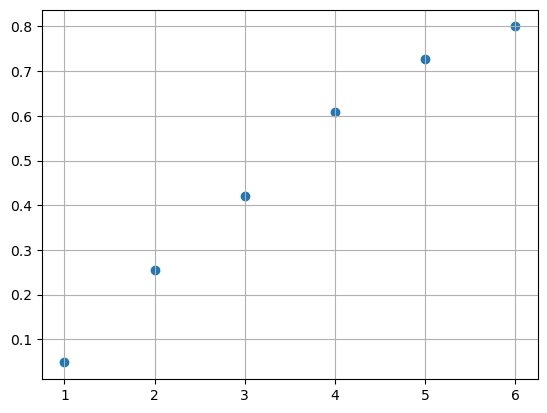

In [4]:
plt.scatter(zn, ext)
plt.grid()
plt.show()

Now let's add a linear trend line the way we've always done it. Let me remind you that for this purpose we used the `np.polyfit()` function, which is a fit of a straight line to the given points.

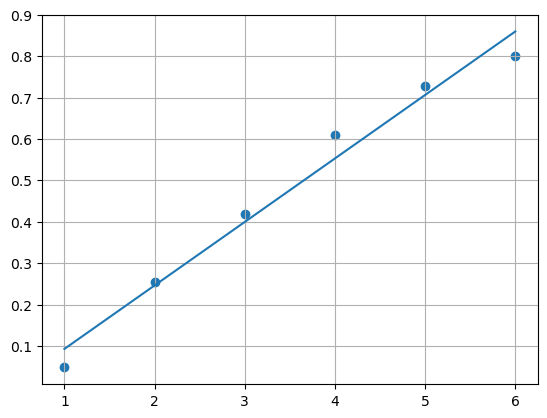

In [5]:
coefs = np.polyfit(zn, ext, 1)
polynom = np.poly1d(coefs)
plt.plot(zn, polynom(zn))
plt.scatter(zn, ext)
plt.grid()
plt.show()

As we can see, the stacking of the dots does not look like it is linear, but let's look at the $R^2$ factor.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Let's make the necessary resizing.

In [7]:
zn = zn.values.reshape(-1, 1)
ext = ext.values

Let's set up a linear regression model and fit the data.

In [8]:
model = LinearRegression()
model.fit(zn, ext)

LinearRegression()

Finally, let's find the regression coefficient.

In [9]:
R2 = r2_score(ext, model.predict(zn))
print(R2)

0.9770910484536227


We see that this value is quite close to $1, but this should not dissuade us from believing that the regression, as you can see from the picture, is clearly not linear. So what should we do?

Let's try to change the degree of regression. That is, instead of fitting a straight line, i.e., with a polynomial of degree 1, we will try to approximate our points with a parabola, a polynomial of degree $2$.

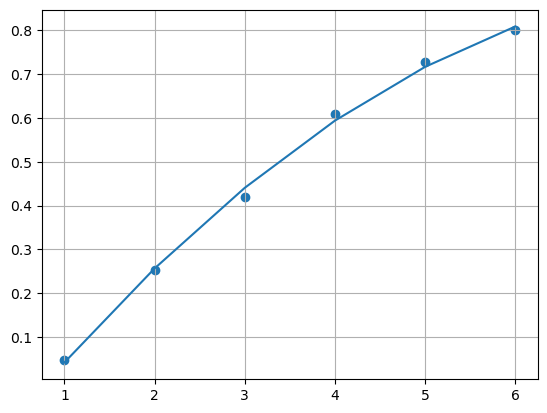

In [10]:
parabolaCoefs = np.polyfit(dfZn['Zn'], dfZn['Ext'], 2)
parabola = np.poly1d(parabolaCoefs)
plt.scatter(zn, ext)
plt.plot(zn, parabola(zn))
plt.grid()
plt.show()

A parabola seems to be a better fit for this regression. Let's calculate the coefficient $R^2$ to be sure.

We cannot do this as in the previous case, so we turn to `PolynomialFeatures` from `sklearn.preprocessing`.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
#  Explicitly set the degree of the polynomial
polyFeatures = PolynomialFeatures(degree=2)
znFit = polyFeatures.fit_transform(zn)

In [13]:
model.fit(znFit, ext)

LinearRegression()

Finally, we find the coefficient we need.

In [14]:
R2 = r2_score(ext, model.predict(znFit))
print(R2)

0.9978697334592648


The value of $0.998$ is very close to one, which, combined with the above picture, gives us every reason to believe that the polynomial regression of degree $2$ is perfectly suitable here. 

For clarity, let's put both lines on the same picture.

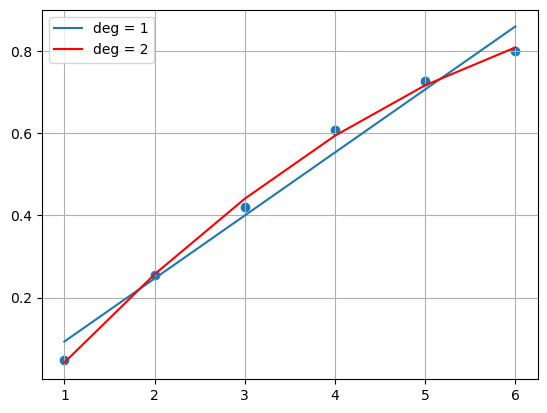

In [15]:
plt.plot(zn, polynom(zn), label = 'deg = 1')
plt.plot(zn, parabola(zn), 'r', label = 'deg = 2')
plt.scatter(zn, ext)
plt.grid()
plt.legend()
plt.show()

> We have plotted the curves, but we have not written out explicit equations for them. Using the material from the last assignment, find the equations of the curves.

You may be too tempted to increase the degree of the polynomial. But you shouldn't be tempted by your desires, because they can lead you into the abyss of wrong reasoning. What happens in our case if we take, for example, a polynomial of degree $5$?

> What will be equal to $R^2$? Make sure you understand why it will equal exactly $1$.

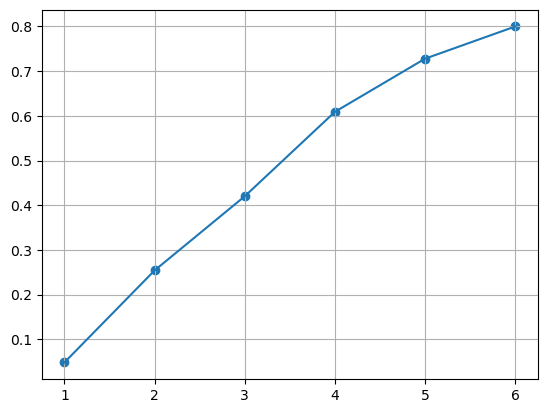

In [16]:
degFiveCoefs = np.polyfit(dfZn['Zn'], dfZn['Ext'], 5)
degFivePolynom = np.poly1d(degFiveCoefs)
plt.plot(zn, degFivePolynom(zn))
plt.scatter(zn, ext)
plt.grid()
plt.show()

## Part 2. Power Regression.

As you know, the equation of the power function looks in general form as follows

$$
y = a x^b.
$$

Let us try, knowing only the functions `np.polyfit()` and `np.poly1d()`, to solve the problem of finding the coefficients of $a$ and $b$.

Prologarithmize both parts of the power function equation

$$
ln(y) = ln(a) + b\cdot ln(x) = b \cdot ln(x) + ln(a)
$$

What do we see? That this equation, if we substitute $x' = ln(x),\: y' = ln(y), \: a' = ln(a)$, is the straight line equation $y' = b x' + a'$.

So we will apply the `np.polyfit()` function to the logarithms from the original data.

In [17]:
zn = dfZn['Zn']
ext = dfZn['Ext']

In [18]:
powerCoef = np.polyfit(np.log(zn), np.log(ext), 1)
powerEquation = np.poly1d(powerCoef)
b = powerCoef[0]
# Check question: why do we take the exponent in the next line?
a = np.exp(powerCoef[1])
powerLine = a * zn**b
print(powerEquation)

 
1.557 x - 2.76


> Control question: What equation did we derive? What is its meaning?

Let's draw a picture.

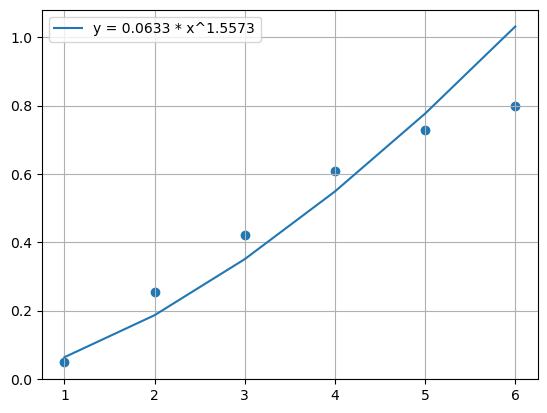

In [19]:
# Note exactly how we assemble the equation
plt.plot(zn, powerLine, label=f'y = {a:.4f} * x^{b:.4f}')
plt.scatter(zn, ext)
plt.grid()
plt.legend()
plt.show()

## Part 3. Exponential Regression.

Let's carry out the same reasoning for an exponential function of the form

$$
y = ae^{xb}.
$$

Again, let's lagarithmize both parts

$$
ln(y) = ln(a) + xb = b\cdot x + ln(a),
$$

That after replacing $y' = ln(y), \: x' = x, a' = ln(a)$ reduces to the equation $y' = b \cdot x' + a'$.

This means that the `np.polyfit()` function must be applied to $x, ln(y)$.

In [20]:
expCoef = np.polyfit(zn, np.log(ext), 1)
expEquation = np.poly1d(expCoef)
b = expCoef[0]
a = np.exp(powerCoef[1])
expLine = a * np.exp(zn * b)

Let's draw the graph again.

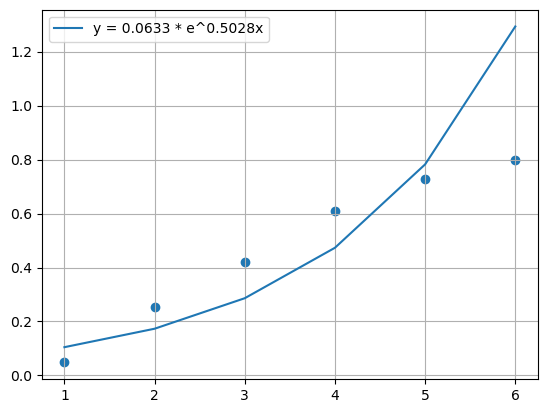

In [21]:
plt.plot(zn, expLine, label=f'y = {a:.4f} * e^{b:.4f}x')
plt.scatter(zn, ext)
plt.grid()
plt.legend()
plt.show()

Of course, the power regression and the exponential regression are not suitable here, but it was useful to break down their construction using the functions you already know.

Let's look at another way to construct these regressions.

## Part 4. `curve_fit()`.

Let's introduce the new `curve_fit()` method from `scipy.optimize`.

In [22]:
from scipy.optimize import curve_fit

Let's set in general form the two functions we used above.

In [23]:
def powerFunc(x, a, b):
    return a * x**b

def expFunc (x, a, b):
    return a * np.exp(x * b)

Below we will use the language construction `x, _ = f()`. The meaning of which can be illustrated by the example below.

In [24]:
def f(x, y):
    l = []
    l.append(x)
    l.append(y)
    return l

x = f(1, 2)
print(x)

x, y = f(1, 2)
print(x)

x, _ = f(1, 2)
print(x)

[1, 2]
1
1


Let's calculate the parameters of the curve given by the `powerFunc` function and find the points.

In [25]:
powerParams, _ = curve_fit(powerFunc, zn, ext)
aPow = powerParams[0]
bPow = powerParams[1]
powerFitLine = powerFunc(zn, aPow, bPow)
# Также выведем уравнение
print(f'y = {aPow:.4f} * x^{bPow:.4f}')

y = 0.1255 * x^1.0685


Similarly for `expFunc`.

In [26]:
expParams, _ = curve_fit(expFunc, zn, ext)
aExp = expParams[0]
bExp = expParams[1]
expFitLine = expFunc(zn, aExp, bExp)
# Также выведем уравнение
print(f'y = {aExp:.4f} * e^{bExp:.4f}x')

y = 0.1591 * e^0.2856x


Let's pair the pictures for `powerLine` and `powerFitLine` as well as for `expLine` and `expFitLine`.

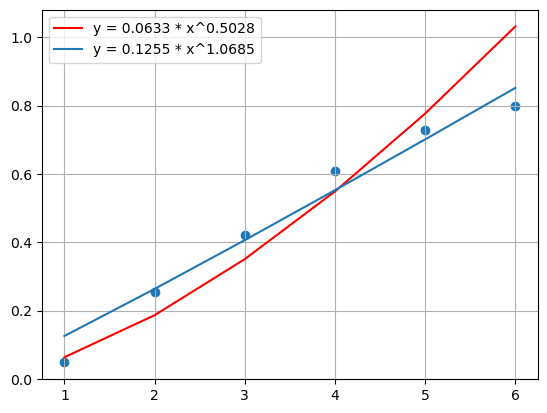

In [27]:
plt.plot(zn, powerLine, 'r', label=f'y = {a:.4f} * x^{b:.4f}')
plt.plot(zn, powerFitLine, label=f'y = {aPow:.4f} * x^{bPow:.4f}')
plt.scatter(zn, ext)
plt.grid()
plt.legend()
plt.show()

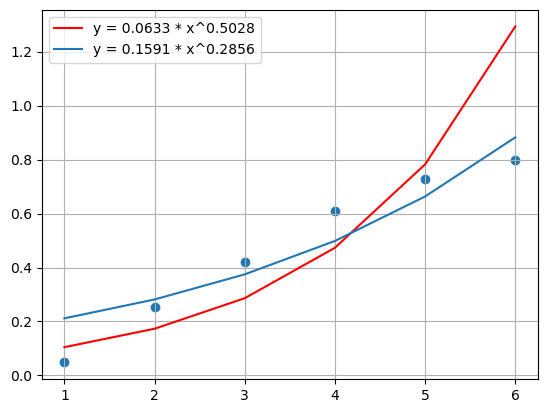

In [28]:
plt.plot(zn, expLine, 'r', label=f'y = {a:.4f} * x^{b:.4f}')
plt.plot(zn, expFitLine, label=f'y = {aExp:.4f} * x^{bExp:.4f}')
plt.scatter(zn, ext)
plt.grid()
plt.legend()
plt.show()

What do we see? That different functions (or more precisely, the numerical methods behind the implementation of these functions) may behave, generally speaking, in different ways. This should not embarrass you, but you should understand exactly what you are doing. Let me remind you that the very obvious point mismatch, we already explained above: polynomial regression works best here.

## Part 5. In lieu of a Conclusion.

In this short course, we learned several ways to solve different, rather typical, statistical problems. As you could see, the possibilities of the language and libraries are very extensive - the same action can be done in several ways, but at the same time, you can always write something yourself.

Once again I want to draw your attention to the fact that any function, method, symbol that you use must be well understood.

You can use this course as a cheat sheet in the future.

## Task.

Complete your individual assignment.

## P. S. Multivariate Analysis.

The last part of your assignment is about multivariate analysis. But today `python` has become such a powerful tool in machine learning that I do not have enough time or experience to lay it out at the proper level in a single notebook.

Nevertheless, suppose we want to solve this problem: we are given two features. We mark them somehow (each pair of points belongs to a particular class). Suppose we have a new point. How do we predict which class it will belong to with the highest probability? 

In [29]:
dfMilk = pd.read_excel('../Data-EN/Milk.xlsx')

In [30]:
dfMilk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Breed    17 non-null     object 
 1   N        17 non-null     int64  
 2   Ca       17 non-null     int64  
 3   P        17 non-null     int64  
 4   Fat      17 non-null     float64
 5   Protein  17 non-null     float64
 6   Acid     17 non-null     float64
 7   Dry      17 non-null     float64
 8   Group    17 non-null     int64  
 9   Alpha    17 non-null     float64
 10  Beta     17 non-null     float64
 11  Gamma    17 non-null     float64
dtypes: float64(7), int64(4), object(1)
memory usage: 1.7+ KB


We will work with the next pair of signs.

In [31]:
ca = dfMilk['Ca']
p = dfMilk['P']

Let's distribute the data by class.

In [32]:
labels = np.array([0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's collect pairs of dots.

In [33]:
X = np.column_stack((ca, p))

In [34]:
print(X)

[[117 109]
 [120 113]
 [119 112]
 [123 110]
 [120 107]
 [121 107]
 [125 100]
 [123  95]
 [129 112]
 [133 112]
 [124 108]
 [128 110]
 [133 102]
 [126 105]
 [133 113]
 [125 107]
 [126 111]]


In [35]:
print(labels)

[0 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2]


Let us define a point whose belonging to one of the classes we are going to check.

In [36]:
testPoint = np.array([[120, 100]])

In [37]:
print(testPoint)

[[120 100]]


We will classify using [Linear Discriminant Analysis](https://ru.wikipedia.org/wiki/Линейный_дискриминантный_анализ) or *LDA*.

The code snippet below performs this analysis. You will need to figure out the format of the data output yourself.

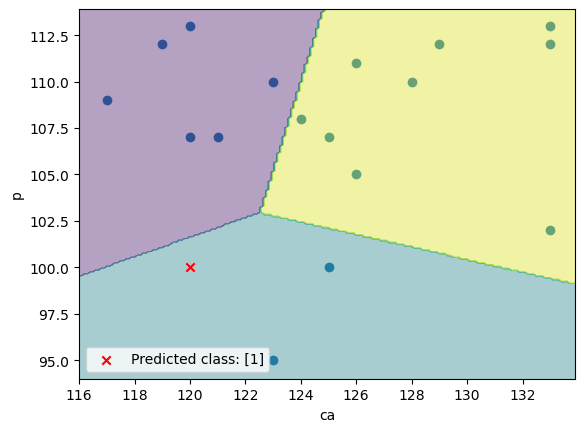

[[0.12290859 0.85796522 0.0191262 ]]


In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X, labels)

# Predicting a class for a new point
predClass = lda.predict(testPoint)

# The probability of belonging to each of the classes
prob = lda.predict_proba(testPoint)

xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.1), np.arange(yMin, yMax, 0.1))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(ca, p)

# Drawing class areas
plt.contourf(xx, yy, Z, alpha=0.4)

# Add a new point
plt.scatter(testPoint[0, 0], testPoint[0, 1], c='red', marker='x', label=f'Predicted class: {predClass}')

plt.xlabel('ca')
plt.ylabel('p')
plt.legend()
plt.show()
print(prob)